In [1]:
query = """
with districts_short as (
    select id, ratio_urban_inhabitants, avg_salary,
           coalesce(unemployment_96, unemployment_95) as unemployment,
           cast(coalesce(crimes_96, crimes_95) as real) / no_inhabitants as crimes from districts
), t as (
    select account_id, amount, balance, k_symbol, type, operation
    from transactions
)
select l.date loan_date, l.amount loan_amount, l.duration loan_duration , l.payments loan_payments,
       a.date account_creation, t.amount, t.balance, t.k_symbol, t.type, t.operation,
       d.ratio_urban_inhabitants, d.avg_salary, d.unemployment, d.crimes, l.status as loan_status, l.id as loan_id
from loans l
    left join accounts a on l.account_id = a.id
    left join t on t.account_id = a.id
    left join districts_short d on a.district_id = d.id
"""

In [2]:
import pandas as pd
import sqlite3
#Random comment
train_dataset = None

with sqlite3.connect("./database_train.db") as db:
    train_dataset = pd.read_sql_query(sql = query, con = db)
    
train_dataset

,loan_date,loan_amount,loan_duration,loan_payments,account_creation,amount,balance,k_symbol,type,operation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,loan_id
0,940105,80952,24,3373,930226,13.5,25049.5,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
1,940105,80952,24,3373,930226,101.0,27845.0,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
2,940105,80952,24,3373,930226,109.5,34394.9,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
3,940105,80952,24,3373,930226,126.8,21788.6,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
4,940105,80952,24,3373,930226,138.3,27855.2,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24489,961227,129408,24,5392,951014,10800.0,33757.6,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24490,961227,129408,24,5392,951014,10800.0,39960.6,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24491,961227,129408,24,5392,951014,11100.0,37530.6,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24492,961227,129408,24,5392,951014,12000.0,39755.1,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308


In [3]:
# Data Cleaning
from functions.clean_data import clean_data

cleaned_interpolated = clean_data(train_dataset)
cleaned_interpolated

/workspaces/feup-machine-learning/functions/clean_data.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.k_symbol[index] = None


,loan_date,loan_amount,loan_duration,loan_payments,account_creation,amount,balance,k_symbol,type,operation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,loan_id
0,940105,80952,24,3373,930226,20236.0,21336.0,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
1,940105,80952,24,3373,930226,20236.0,30744.0,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
2,940105,80952,24,3373,930226,20236.0,39961.8,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
3,940105,80952,24,3373,930226,20236.0,40800.4,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
4,940105,80952,24,3373,930226,20236.0,45285.5,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24479,961227,129408,24,5392,951014,10800.0,33757.6,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24480,961227,129408,24,5392,951014,10800.0,39960.6,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24481,961227,129408,24,5392,951014,11100.0,37530.6,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24482,961227,129408,24,5392,951014,12000.0,39755.1,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308


In [4]:
from functions.pre_process import standardize

features_to_standardize = ["loan_date", "loan_amount", "loan_payments", "account_creation", "amount", "balance", "ratio_urban_inhabitants", "avg_salary", "unemployment", "crimes"]
scaled_train_dataset = standardize(cleaned_interpolated, features_to_standardize)
scaled_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.954659,1.560880,2.255295,-1.416673,2.205400,4959
1,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.565310,1.560880,2.255295,-1.416673,2.205400,4959
2,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.183833,1.560880,2.255295,-1.416673,2.205400,4959
3,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.149128,1.560880,2.255295,-1.416673,2.205400,4959
4,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,0.036488,1.560880,2.255295,-1.416673,2.205400,4959
...,...,...,...,...,...,...,...,...,...,...,...
24479,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.440593,-0.273602,-1.073948,1.415530,-0.433647,7308
24480,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.183883,-0.273602,-1.073948,1.415530,-0.433647,7308
24481,1.211803,-0.165369,0.554754,1.373199,0.147967,-0.284448,-0.273602,-1.073948,1.415530,-0.433647,7308
24482,1.211803,-0.165369,0.554754,1.373199,0.220222,-0.192387,-0.273602,-1.073948,1.415530,-0.433647,7308


In [5]:
from functions.pre_process import remove_outliers

no_outliers_train_dataset, no_outliers_cleaned_interpolated = remove_outliers(scaled_train_dataset, cleaned_interpolated)
no_outliers_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.954659,1.560880,2.255295,-1.416673,2.205400,4959
1,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.565310,1.560880,2.255295,-1.416673,2.205400,4959
2,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.183833,1.560880,2.255295,-1.416673,2.205400,4959
3,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.149128,1.560880,2.255295,-1.416673,2.205400,4959
4,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,0.036488,1.560880,2.255295,-1.416673,2.205400,4959
...,...,...,...,...,...,...,...,...,...,...,...
23633,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.440593,-0.273602,-1.073948,1.415530,-0.433647,7308
23634,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.183883,-0.273602,-1.073948,1.415530,-0.433647,7308
23635,1.211803,-0.165369,0.554754,1.373199,0.147967,-0.284448,-0.273602,-1.073948,1.415530,-0.433647,7308
23636,1.211803,-0.165369,0.554754,1.373199,0.220222,-0.192387,-0.273602,-1.073948,1.415530,-0.433647,7308


In [6]:
# Binarization
from functions.pre_process import binarize

features_to_binarize = ["loan_status"]
binarized_train_data_set = binarize(no_outliers_cleaned_interpolated, features_to_binarize)
binarized_train_data_set

,loan_status
0,1
1,1
2,1
3,1
4,1
...,...
23633,1
23634,1
23635,1
23636,1


In [7]:
# One-hot encoder
from functions.pre_process import one_hot_encode

features_to_encode = ["loan_duration", "type", "k_symbol", "operation"]
hot_encoded_train_dataset = one_hot_encode(no_outliers_cleaned_interpolated, features_to_encode)
hot_encoded_train_dataset

,is_loan_duration_12,is_loan_duration_24,is_loan_duration_36,is_loan_duration_48,is_loan_duration_60,is_type_credit,is_type_withdrawal,is_type_withdrawal in cash,is_k_symbol_household,is_k_symbol_insurrance payment,is_k_symbol_interest credited,is_k_symbol_payment for statement,is_k_symbol_sanction interest if negative balance,is_operation_collection from another bank,is_operation_credit card withdrawal,is_operation_credit in cash,is_operation_remittance to another bank,is_operation_withdrawal in cash
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23634,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23635,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# Recreate train_dataset after preprocessing

from functions.pre_process import re_create_dataframe

pre_processed_dataframe = re_create_dataframe(no_outliers_train_dataset, hot_encoded_train_dataset, binarized_train_data_set)
pre_processed_dataframe

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,...,is_k_symbol_household,is_k_symbol_insurrance payment,is_k_symbol_interest credited,is_k_symbol_payment for statement,is_k_symbol_sanction interest if negative balance,is_operation_collection from another bank,is_operation_credit card withdrawal,is_operation_credit in cash,is_operation_remittance to another bank,is_operation_withdrawal in cash
0,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.954659,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.565310,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.183833,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.149128,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,0.036488,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.440593,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23634,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.183883,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23635,1.211803,-0.165369,0.554754,1.373199,0.147967,-0.284448,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23636,1.211803,-0.165369,0.554754,1.373199,0.220222,-0.192387,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# Transformation
from functions.transform_data import data_transformation_train

processed_df = data_transformation_train(no_outliers_train_dataset, pre_processed_dataframe)
processed_df

,loan_date,loan_amount,loan_payments,account_creation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,is_loan_duration_12,...,household_median,insurrance_payment_median,interest_credited_median,payment_for_statement_median,sanction_interest_if_negative_balance_median,collection_from_another_bank_median,credit_card_withdrawal_median,credit_in_cash_median,remittance_to_another_bank_median,op_withdrawal_in_cash_median
loan_id,,,,,,,,,,,,,,,,,,,,,
4959,-1.230526,-0.609041,-0.358544,-0.918944,1.560880,2.255295,-1.416673,2.205400,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4961,1.119530,-1.073040,-0.743043,1.306269,-0.079714,-0.327103,-0.657717,-0.743820,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4973,1.127971,0.169308,1.243686,0.271122,-0.581835,-0.835769,-0.902989,-0.863412,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,1.197812,-0.540480,1.449506,2.420365,0.830070,-0.167065,1.656175,0.786549,1,1.0,...,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0
5002,-1.181268,-0.390611,2.066515,-0.819708,-1.009384,-0.771904,0.290979,-1.044577,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,1.185786,2.243184,1.074507,0.282700,-0.527149,-0.590077,0.378907,-0.095166,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7284,-2.293163,-0.866916,0.105569,-0.931294,-0.830410,-0.371433,0.050334,-0.288568,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7304,0.032612,2.494246,1.281232,1.319391,1.560880,2.255295,-1.416673,2.205400,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# N clusters
data = processed_df
possible_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [11]:
# K Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results = []
silhouette_scores = []
inertias = []

for n_clusters in possible_n_clusters:
    k_means_clusterer =  KMeans(n_clusters=n_clusters, random_state=19)
    k_means_clusterer.fit(data)
    labels = k_means_clusterer.predict(data)
    silhouette_avg = silhouette_score(data, labels)

    results.append(labels)
    silhouette_scores.append(silhouette_avg)
    inertias.append(k_means_clusterer.inertia_)


    



<AxesSubplot:xlabel='k'>

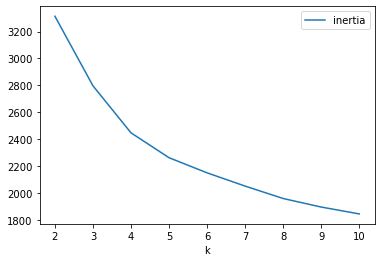

In [12]:
pd.DataFrame({"k": possible_n_clusters, "inertia": inertias}).plot(x="k")
# pick k = 5

In [14]:
labels = results[3]
data = data.assign(cluster=labels)
data

,loan_date,loan_amount,loan_payments,account_creation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,is_loan_duration_12,...,insurrance_payment_median,interest_credited_median,payment_for_statement_median,sanction_interest_if_negative_balance_median,collection_from_another_bank_median,credit_card_withdrawal_median,credit_in_cash_median,remittance_to_another_bank_median,op_withdrawal_in_cash_median,cluster
loan_id,,,,,,,,,,,,,,,,,,,,,
4959,-1.230526,-0.609041,-0.358544,-0.918944,1.560880,2.255295,-1.416673,2.205400,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4961,1.119530,-1.073040,-0.743043,1.306269,-0.079714,-0.327103,-0.657717,-0.743820,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4973,1.127971,0.169308,1.243686,0.271122,-0.581835,-0.835769,-0.902989,-0.863412,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4996,1.197812,-0.540480,1.449506,2.420365,0.830070,-0.167065,1.656175,0.786549,1,1.0,...,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,3
5002,-1.181268,-0.390611,2.066515,-0.819708,-1.009384,-0.771904,0.290979,-1.044577,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,1.185786,2.243184,1.074507,0.282700,-0.527149,-0.590077,0.378907,-0.095166,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
7284,-2.293163,-0.866916,0.105569,-0.931294,-0.830410,-0.371433,0.050334,-0.288568,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
7304,0.032612,2.494246,1.281232,1.319391,1.560880,2.255295,-1.416673,2.205400,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [ ]:
import seaborn as sns
plt = sns.pairplot(data, hue="cluster")